<a href="https://colab.research.google.com/github/JulioCesarMS/StochasticProcesses/blob/main/6_Stochastic_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stochastic simulation**

In [15]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from random import sample
#!pip install mplcyberpunk
import mplcyberpunk
plt.style.use("cyberpunk")
#sns.set()

In [46]:
class StochasticSimulation:
  
    def __init__(self, steps=100, n_times=1, t=1):
        self.steps = steps
        self.n_times = n_times 
        self.dt = t  #/ steps
    
    
    def SimpleRandomWalk(self, p):
        # creating array
        rw = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(rw.shape[1]-1):
            for i in range(rw.shape[0]):
                rw[i][j+1] = rw[i][j] + np.random.choice([-1,1], p=[1-p, p])#sample([-1,1], 1)
    
        df = pd.DataFrame(rw) 
        return df 
    
    def BrownianMotion(self):
        # creating array
        bm = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bm.shape[1]-1):
            for i in range(bm.shape[0]):
                bm[i][j+1] = bm[i][j] + np.random.normal(size=1)
    
        df = pd.DataFrame(bm)  
        return df

    def BrownianMotionDrift(self, mu, sigma):
        # creating array
        bmd = np.zeros( (self.n_times, self.steps+1))
        # initiate the loop
        for j in range(bmd.shape[1]-1):
            for i in range(bmd.shape[0]):
                bmd[i][j+1] = bmd[i][j] + mu*self.dt  + sigma*np.sqrt(self.dt)*np.random.normal(size=1)
    
        df = pd.DataFrame(bmd)  
        return df

# **Brownian Motion**

In [3]:
# simulation
steps = 10000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotion()
bm_sim.shape

(100, 10001)

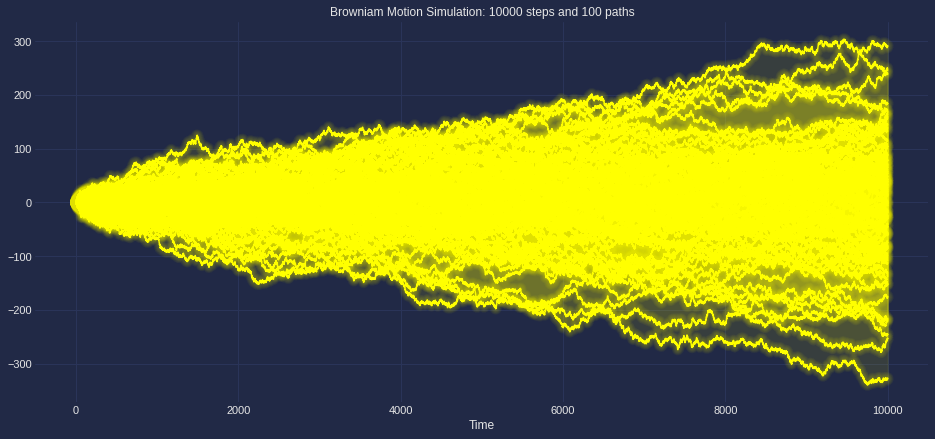

In [33]:
# plotting Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Browniam Motion Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

# **Simple Random Walk**

In [37]:
# simulation
steps = 10000
n = 100 # paths
bm_sim = StochasticSimulation(steps=steps, n_times=n).SimpleRandomWalk(p=0.5)
bm_sim.shape

(100, 10001)

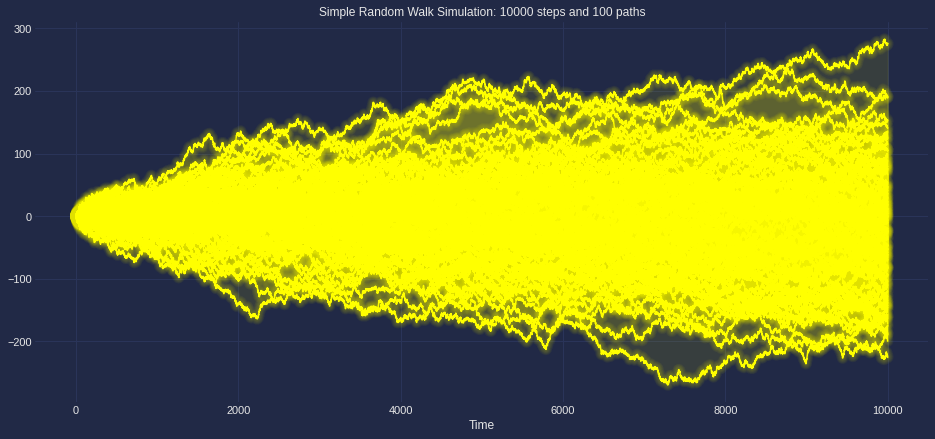

In [38]:
# plotting Brownian motion
plt.figure(figsize=(16,7))
for i in range(bm_sim.shape[0]):
    plt.plot(list(bm_sim.columns), bm_sim.iloc[i][:], color='yellow')
plt.title('Simple Random Walk Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
mplcyberpunk.add_glow_effects()
plt.show()

# **Brownian Motion with Drift and Volatility**

In [60]:
# simulation
steps = 10000
n = 100 # paths
bmd_sim = StochasticSimulation(steps=steps, n_times=n).BrownianMotionDrift(mu=0.03, sigma=0.8)
bmd_sim.shape

(100, 10001)

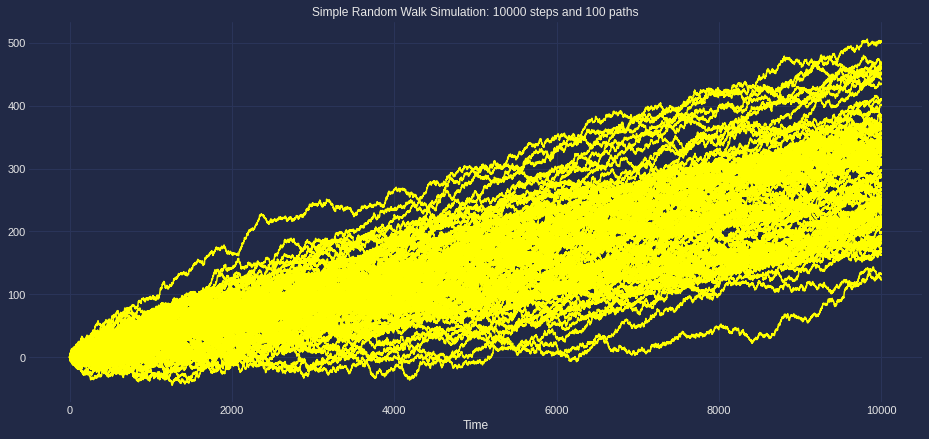

In [63]:
# plotting Brownian motion with drift and volatility
plt.figure(figsize=(16,7))
for i in range(bmd_sim.shape[0]):
    plt.plot(list(bmd_sim.columns), bmd_sim.iloc[i][:], color='yellow')
plt.title('Simple Random Walk Simulation: {} steps and {} paths'.format(steps, n))
plt.xlabel('Time')
#mplcyberpunk.add_glow_effects()
plt.show()